In [2]:
import pandas as pd
import numpy as np
import os
import json
import altair as alt
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

In [3]:
#JSON_FILE = "../results/TP53/TP53_codons.fasta.ABSREL.json"
JSON_FILE = "../results/BDNF/Recombinants/BDNF_codons_RDP_recombinationFree.fas.ABSREL.json"
TREE_FILE = ""
pvalueThreshold = 0.05

In [4]:
def getABSRELData(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["branch attributes"]["0"]
#end method

def getABSRELHeaders(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["headers"]
#end method

"""
 "test results":{
   "P-value threshold":0.05,
   "positive test results":38,
   "tested":513
  }

"""

def getABSREL_TestResults(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["test results"]
#end method


def getABSREL_Input(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["input"]
#end method

In [5]:
data = getABSRELData(JSON_FILE)

In [6]:
df = pd.DataFrame(data)
df = df.T
df

,Baseline MG94xREV,Baseline MG94xREV omega ratio,Corrected P-value,Full adaptive model,Full adaptive model (non-synonymous subs/site),Full adaptive model (synonymous subs/site),LRT,Nucleotide GTR,Rate Distributions,Rate classes,Uncorrected P-value,original name
NM_001009828_1_Felis_catus_brain_derived_neurotrop,0.006799,1.525636,1,0.006784,0.00542,0.001364,0.044842,0.006801,"[[1.427335518071002, 1]]",1,0.459807,NM_001009828_1_Felis_catus_brain_derived_neuro...
NM_001012441_1_Pan_troglodytes_brain_derived_neuro,0.001349,0,1,0.001345,0.0,0.001345,0,0.001346,"[[0, 1]]",1,1,NM_001012441_1_Pan_troglodytes_brain_derived_n...
NM_001048142_1_Mus_musculus_brain_derived_neurotro,0,1,1,0,0.0,0.0,0,0,"[[1, 1]]",1,1,NM_001048142_1_Mus_musculus_brain_derived_neur...
NM_001081787_1_Equus_caballus_brain_derived_neurot,0,1,1,0,0.0,0.0,0,0,"[[1, 1]]",1,1,NM_001081787_1_Equus_caballus_brain_derived_ne...
NM_001270630_1_Rattus_norvegicus_brain_derived_neu,0.000692,10000000000,1,0.001967,0.000985,0.000982,0,0.000618,"[[0.3602201891878003, 1]]",1,1,NM_001270630_1_Rattus_norvegicus_brain_derived...
...,...,...,...,...,...,...,...,...,...,...,...,...
XM_039866065_1_PREDICTED_Pteropus_giganteus_brain_,0.001401,10000000000,1,0.001395,0.001395,0.0,2.445937,0.0014,"[[10000000000, 1]]",1,0.111872,XM_039866065_1_PREDICTED_Pteropus_giganteus_br...
XM_040258919_1_PREDICTED_Oryx_dammah_brain_derived,0.004106,0.183419,1,0.00413,0.001334,0.002796,0,0.004008,"[[0.1714055403458054, 1]]",1,1,XM_040258919_1_PREDICTED_Oryx_dammah_brain_der...
XM_040284582_1_PREDICTED_Ictidomys_tridecemlineatu,0.005615,1.232249,0.869168,0.014656,0.013362,0.001294,9.099177,0.005464,"[[0.1989185418869253, 0.9935902378077148], [54...",2,0.003683,XM_040284582_1_PREDICTED_Ictidomys_tridecemlin...
XM_040980297_1_PREDICTED_Ochotona_curzoniae_brain_,0.005184,0.12944,1,0.004136,0.001308,0.002828,0,0.004137,"[[0.1661918223497026, 1]]",1,1,XM_040980297_1_PREDICTED_Ochotona_curzoniae_br...


### Selected Branches

In [7]:
df_results = df[df["Corrected P-value"] < 0.05]
df_results.reset_index(inplace=True)
df_results.index += 1
df_results.drop('index', axis=1, inplace=True)
df_results

print(df_results.to_markdown())

|    |   Baseline MG94xREV |   Baseline MG94xREV omega ratio |   Corrected P-value |   Full adaptive model |   Full adaptive model (non-synonymous subs/site) |   Full adaptive model (synonymous subs/site) |     LRT |   Nucleotide GTR | Rate Distributions                                                                     |   Rate classes |   Uncorrected P-value | original name                                      |
|---:|--------------------:|--------------------------------:|--------------------:|----------------------:|-------------------------------------------------:|---------------------------------------------:|--------:|-----------------:|:---------------------------------------------------------------------------------------|---------------:|----------------------:|:---------------------------------------------------|
|  1 |           0.0239639 |                        1.22712  |         2.17287e-09 |               6.14047 |                                          6.13959 |   

/Users/user/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
df_results = df[df["Corrected P-value"] < 0.05]
df_results['Name'] = df_results.index
df_results.reset_index(inplace=True)
df_results.index += 1
df_results

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Baseline MG94xREV,Baseline MG94xREV omega ratio,Corrected P-value,Full adaptive model,Full adaptive model (non-synonymous subs/site),Full adaptive model (synonymous subs/site),LRT,Nucleotide GTR,Rate Distributions,Rate classes,Uncorrected P-value,original name,Name
1,Node205,0.023964,1.227123,0.0,6.140468,6.139589,0.000879,48.633266,0.026616,"[[1, 0.9749129613580164], [100000, 0.025087038...",2,0.0,NaN,Node205
2,Node3,0.036113,2.162836,0,38.287971,38.284873,0.003098,86.46133,0.021402,"[[0.2089629313919298, 0.9556004230678048], [10...",2,0,NaN,Node3
3,Node43,0.084018,0.812336,0.0,145.990377,145.985348,0.00503,53.658458,0.034331,"[[0, 0.8957260595073274], [100000, 0.104273940...",2,0.0,NaN,Node43
4,Node89,0.044668,0.155477,0.005225,5.87887,5.852969,0.025901,19.305643,0.042798,"[[0.0943713775571761, 0.9789152775955712], [38...",2,0.000022,NaN,Node89
5,XM_007497196_2_PREDICTED_Monodelphis_domestica...,0.050206,0.235127,0.000005,27.792903,27.767412,0.025491,33.145102,0.048506,"[[0.003429329562158136, 0.9569476714093881], [...",2,0.0,XM_007497196_2_PREDICTED_Monodelphis_domestica...,XM_007497196_2_PREDICTED_Monodelphis_domestica...


In [10]:
df_results.shape

(5, 14)

In [11]:
df_results.to_csv("BDNF_aBSREL_Table.csv")

## Visualize

In [36]:
x = getABSREL_Input(JSON_FILE)
TREE = x["trees"]["0"]
#TREE 

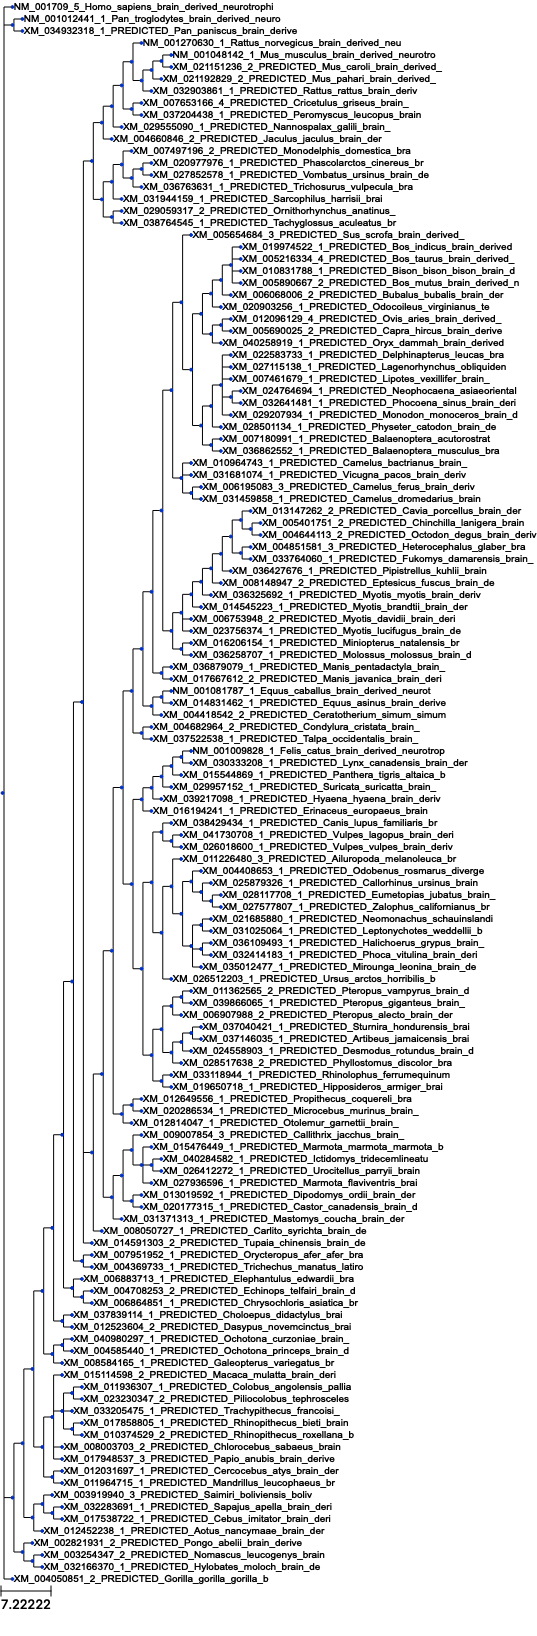

In [37]:
#t = Tree( "((a,b),c);" )
t = Tree(TREE+";", format=1)
#t.render("mytree.png")
t.render("%%inline")  

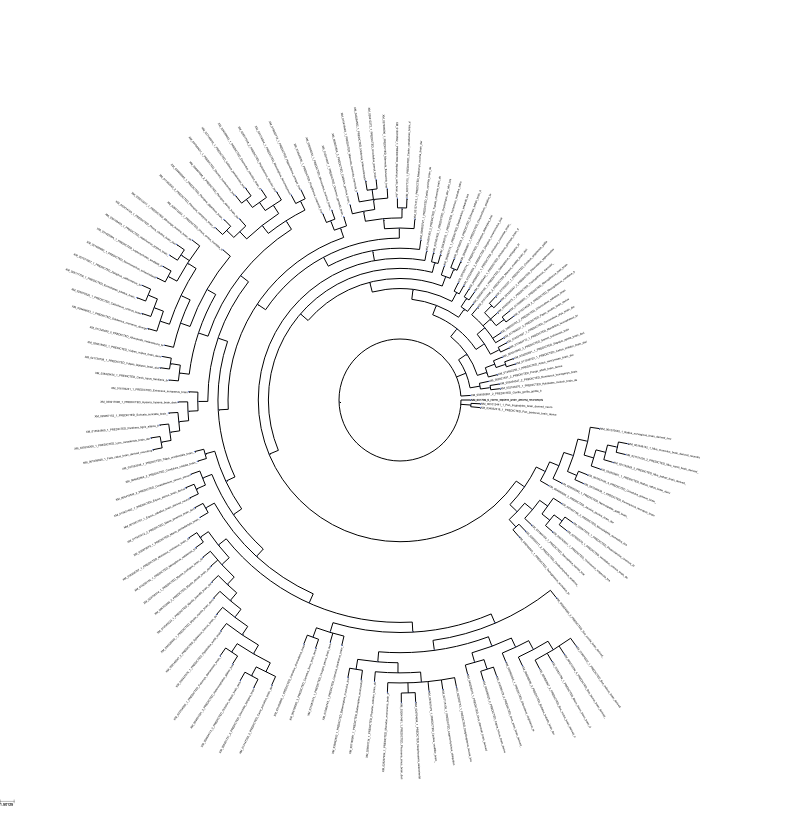

In [39]:

t = Tree(TREE+";", format=1)
ts = TreeStyle()
ts.mode = "c" # use circular mode 

t.render("%%inline", tree_style=ts, w=800)  

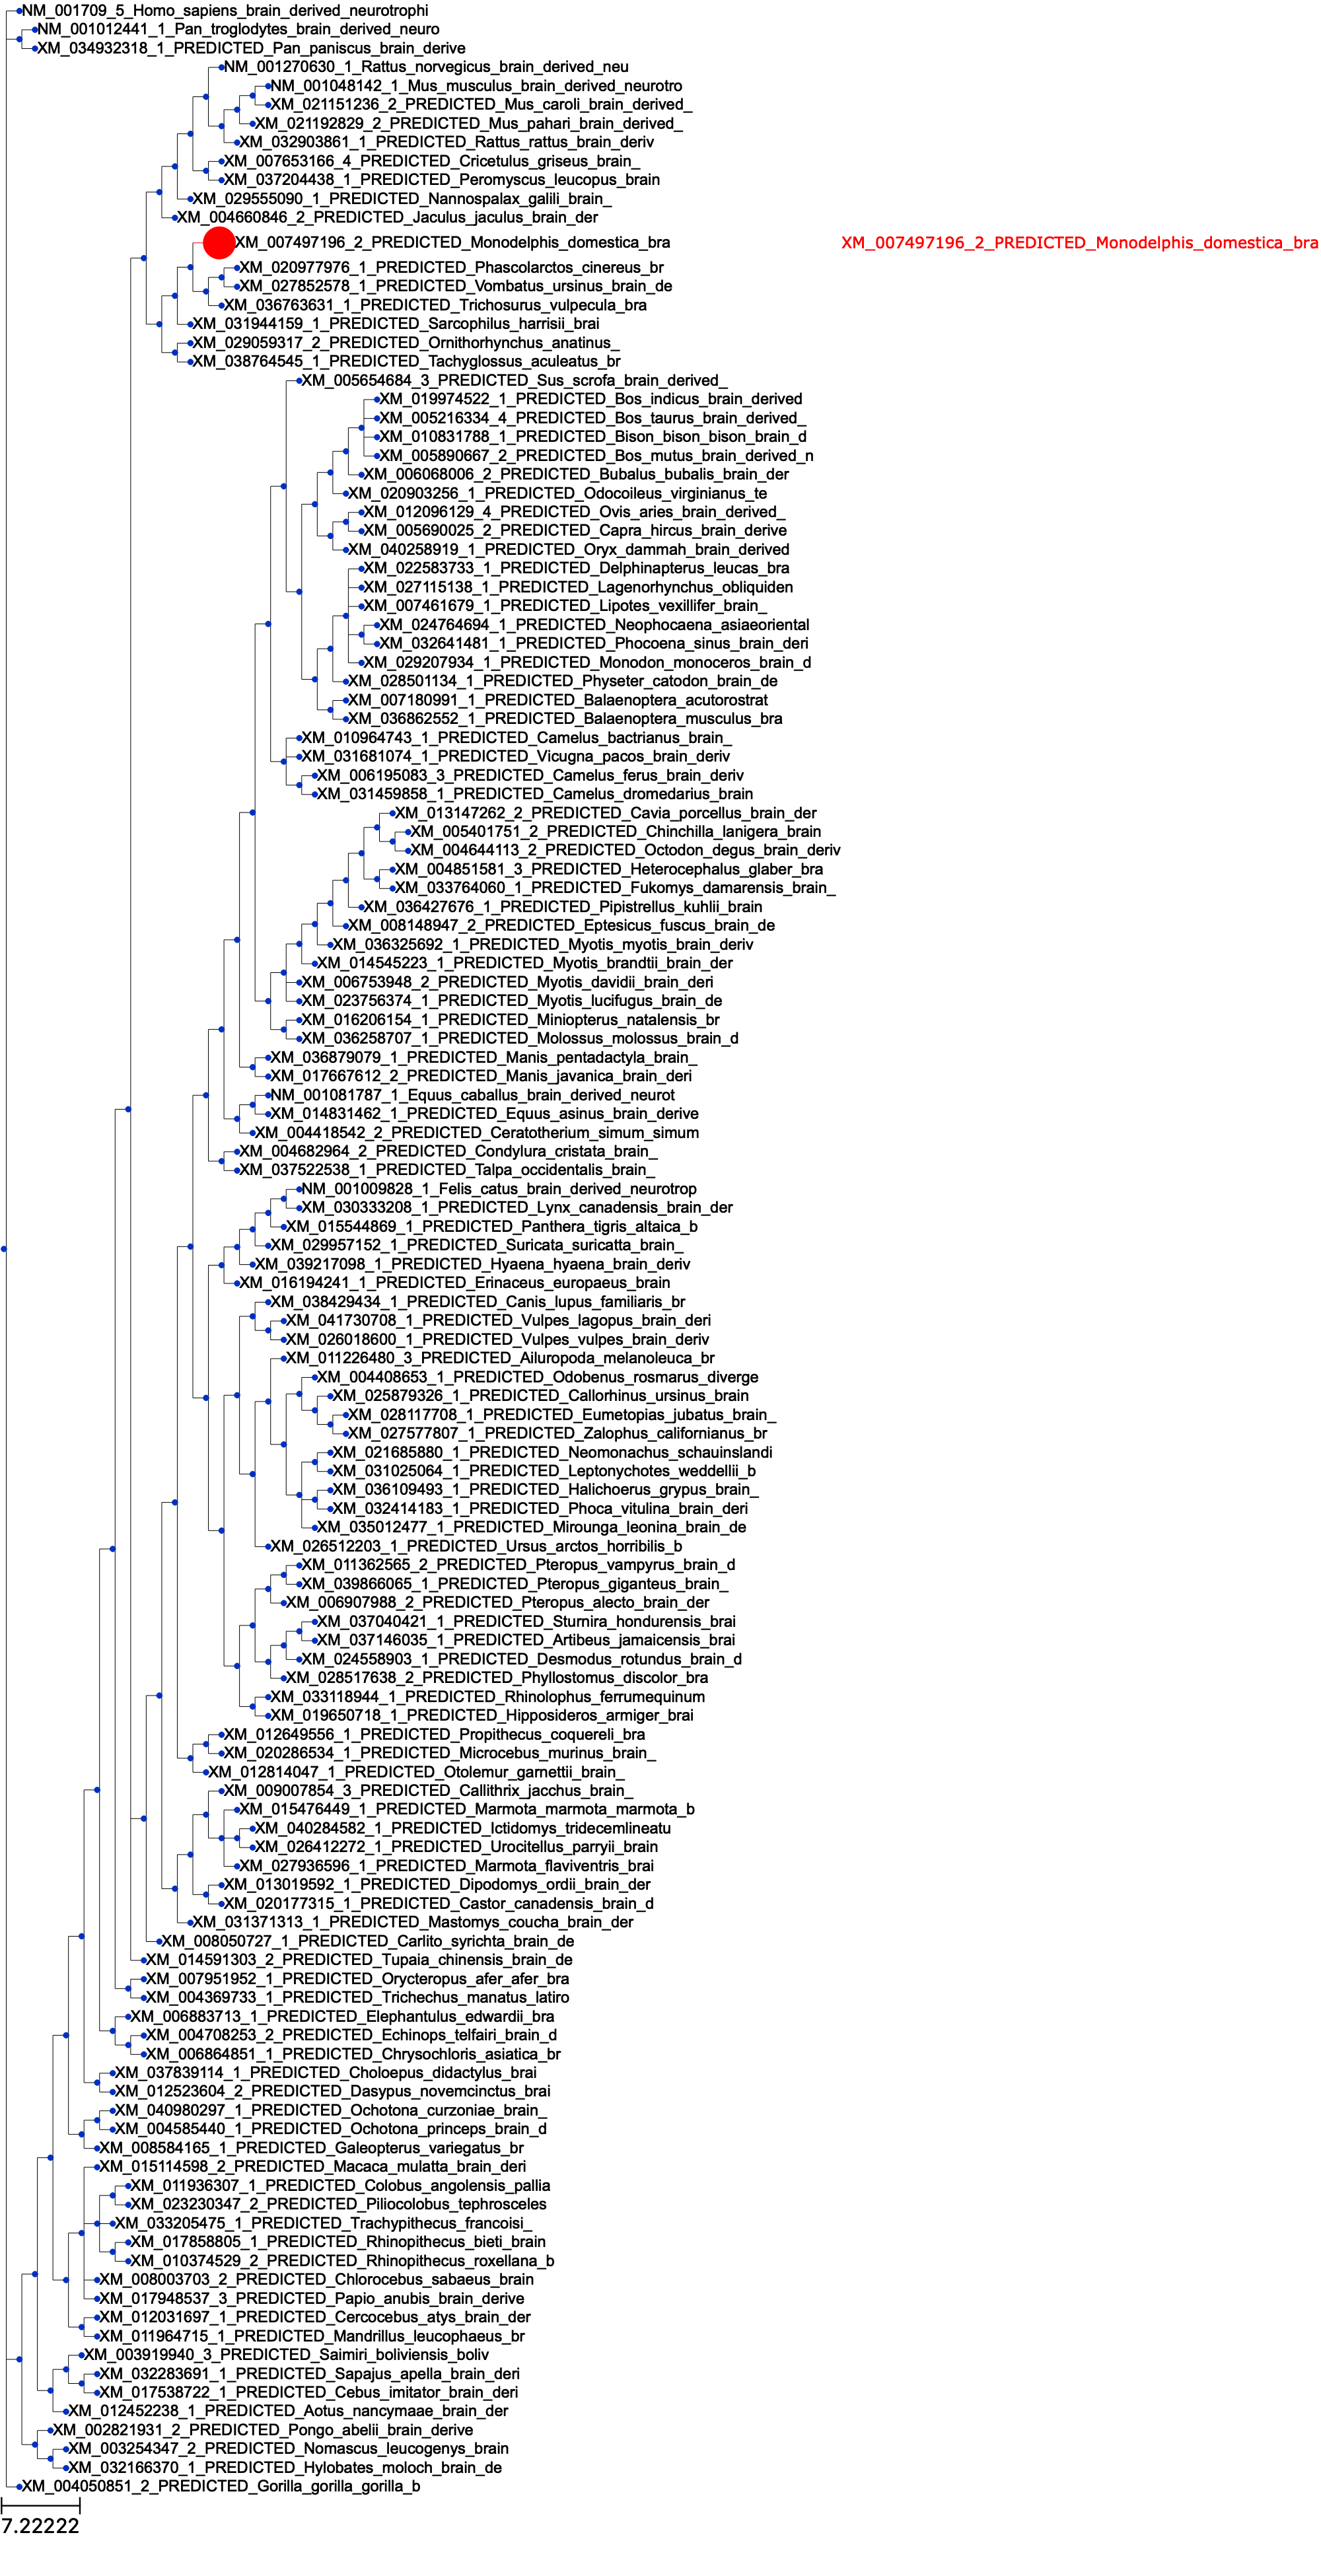

In [40]:
from ete3 import TreeStyle
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

t = Tree(TREE+";", format=1)
ts = TreeStyle()
#ts.show_leaf_name = True
ts.mode = "c" # use circular mode 

for l in t.iter_leaves():
    #print([str(l).replace("--", "").replace("\n", "")])
    
    if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
        
    # create a new label with a color attribute
    N = AttrFace("name", fgcolor="Red")
    # label margins
    N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 20
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    
    #l.set_style(ns)
    l.img_style = ns
    
    
    
#end for

t.render("%%inline", w=2000)  

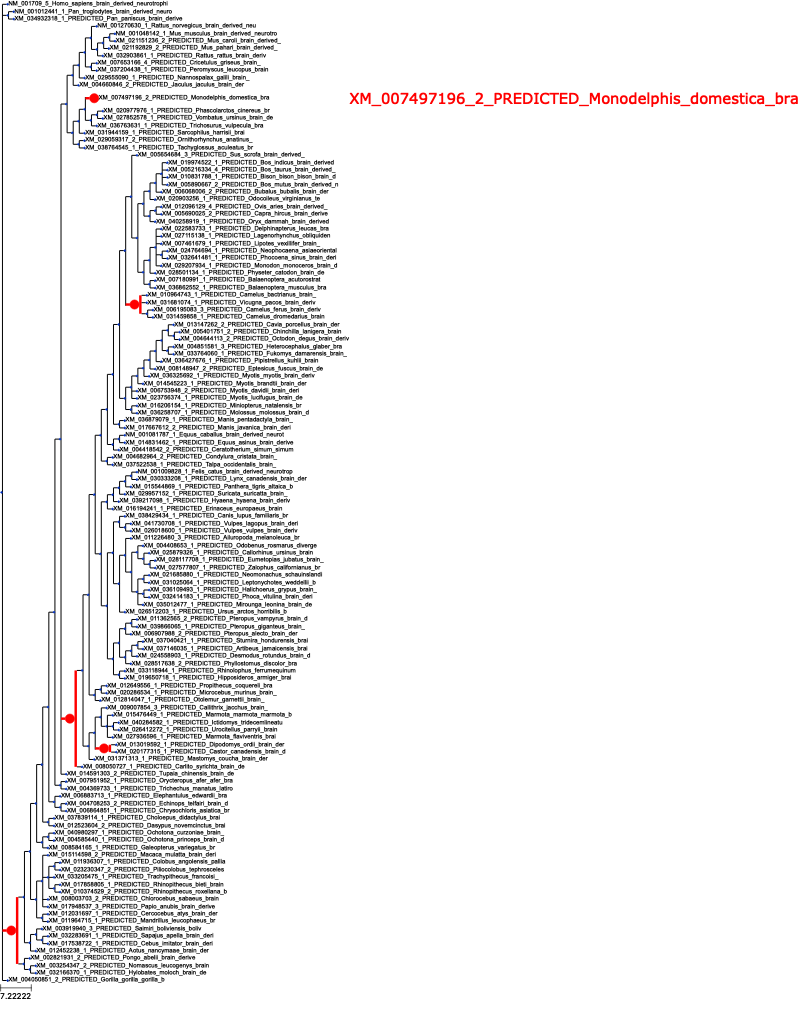

In [41]:
from ete3 import TreeStyle
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

t = Tree(TREE+";", format=1)
ts = TreeStyle()
#ts.show_leaf_name = True
ts.mode = "c" # use circular mode 
ts.show_branch_length = True
ts.show_scale = True

#for l in t.iter_leaves():
for l in t.traverse("postorder"):
    #print([str(l).replace("--", "").replace("\n", "")])
    
    #if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
    if l.name not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
        
    # create a new label with a color attribute
    N = AttrFace("name", fgcolor="Red", fsize=24)
    # label margin
    N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 15
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    ns["vt_line_width"] = 4
    ns["hz_line_width"] = 4
    #style["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
    #style["hz_line_type"] = 0
    
    #l.set_style(ns)
    l.img_style = ns
#end for

t.render("%%inline", w=800, dpi=300)  

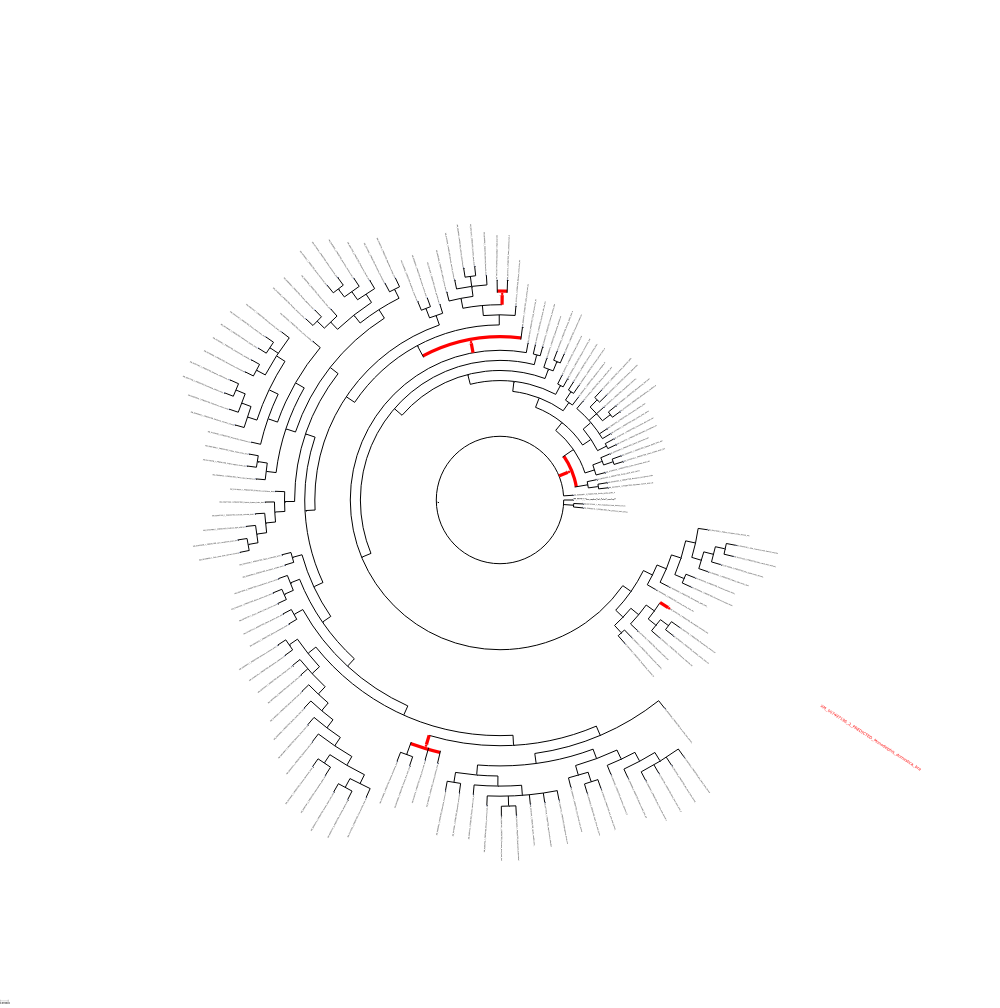

In [44]:
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

t = Tree(TREE+";", format=1)
ts = TreeStyle()
#ts.show_leaf_name = True
ts.mode = "c" # use circular mode 
ts.show_branch_length = True
ts.show_scale = True

#for l in t.iter_leaves():
for l in t.traverse("postorder"):
    #print([str(l).replace("--", "").replace("\n", "")])
    
    #if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
    if l.name not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
        
    # create a new label with a color attribute
    N = AttrFace("name", fgcolor="Red", fsize=24)
    # label margin
    N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 15
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    ns["vt_line_width"] = 20
    ns["hz_line_width"] = 20
    #style["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
    #style["hz_line_type"] = 0
    
    #l.set_style(ns)
    l.img_style = ns
#end for

t.render("%%inline", tree_style=ts, w=1000)  

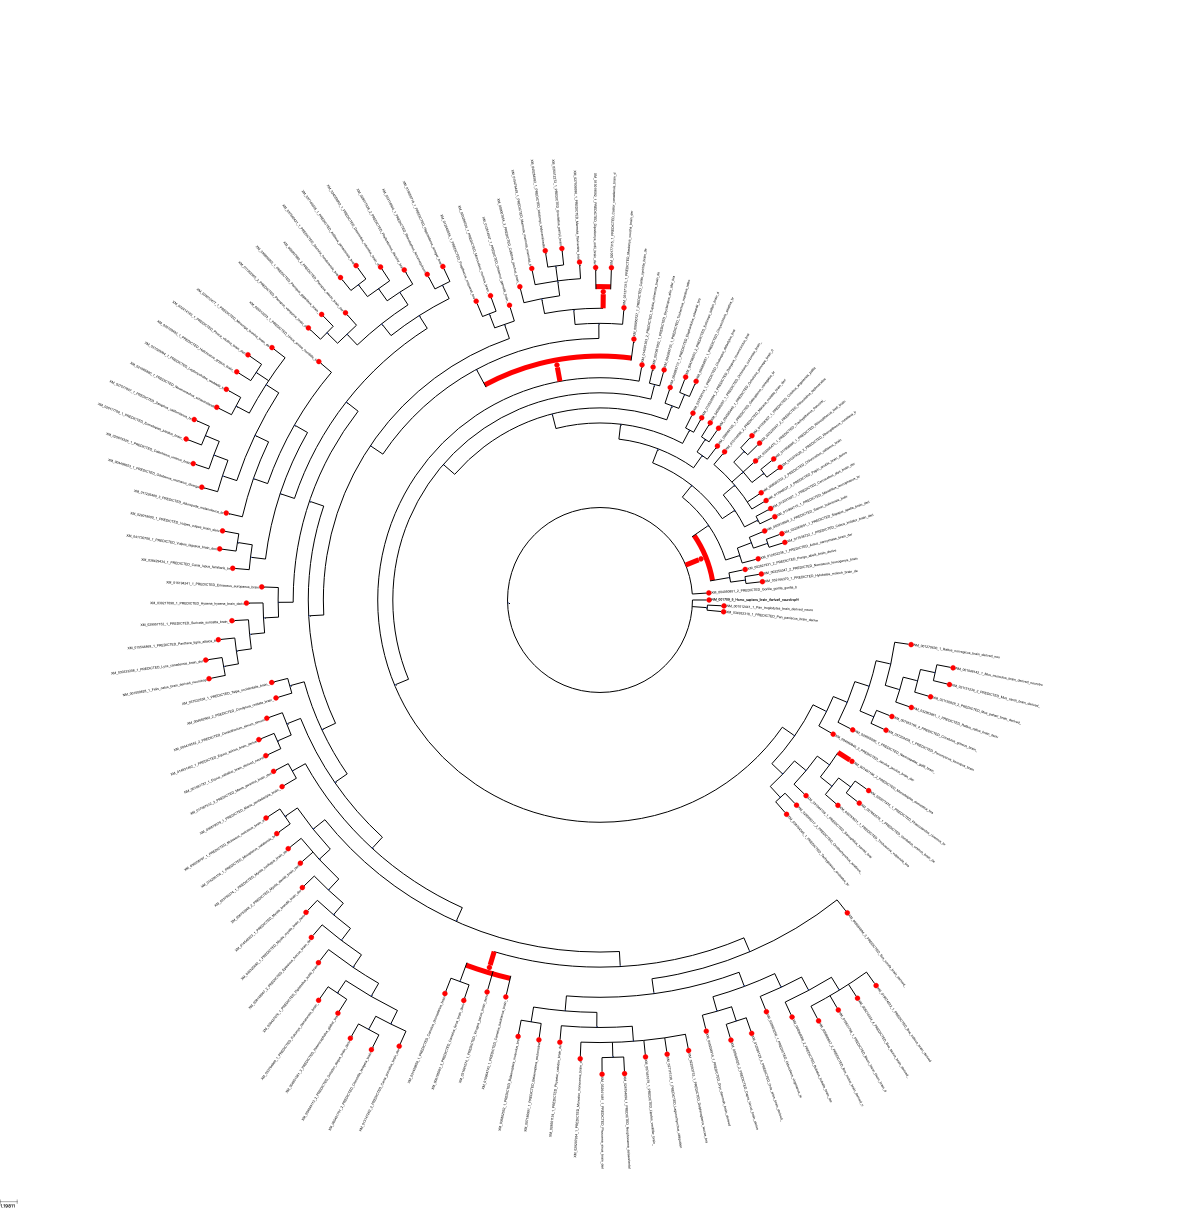

In [70]:
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace, faces

t = Tree(TREE+";", format=1)
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c" # use circular mode 
#ts.show_branch_length = True
ts.show_scale = True
#ts.force_topology = True
#t.populate(50, random_branches=True)
#ts.scale =  120

for n in t.traverse():
    if not n.is_leaf(): continue 
    nstyle = NodeStyle()
    nstyle["fgcolor"] = "red"
    nstyle["size"] = 15
    n.set_style(nstyle)

#for l in t.iter_leaves():
for l in t.traverse("postorder"):
    #name_face = AttrFace("name")
    #faces.add_face_to_node(name_face, node, column=0, position="branch-right")
    #print([str(l).replace("--", "").replace("\n", "")])
    #if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
    
    #if node.is_leaf():
    #    print("a")
    
    if l.name not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
    
    
        
    # create a new label with a color attribute
    #N = AttrFace("name", fgcolor="Red", fsize=24)
    # label margin
    #N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    #l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 15
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    ns["vt_line_width"] = 15
    ns["hz_line_width"] = 15
    #style["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
    #style["hz_line_type"] = 0
    
    l.set_style(ns)
    l.img_style = ns
#end for

t.render("%%inline", tree_style=ts, w=1200)  

In [94]:
t = Tree(TREE+";", format=1)
ts = TreeStyle()

#ts.show_leaf_name = True
#ts.mode = "c" # use circular mode 
#ts.show_scale = True

#nameFace = faces.AttrFace("name", fsize=20, fgcolor="#009000")

#for n in t.traverse():
#    if n.is_leaf():
#        faces.add_face_to_node(nameFace, n, column=0)
    
    
for l in t.traverse("postorder"):    
    if l.name not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
       
        
    # create a new label with a color attribute
    #N = AttrFace("name", fgcolor="Red", fsize=24)
    # label margin
    #N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    #l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 5
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    ns["vt_line_width"] = 5
    ns["hz_line_width"] = 5
    
    l.set_style(ns)
    l.img_style = ns
#end for

t.render("%%inline", tree_style=ts, w=600)  

t.render("BDNF_Recombinants_aBSREL.png", tree_style=ts, w=600)  

{'nodes': [[0.5434782608695656,
   859.7826086956528,
   4.8913043478260905,
   864.1304347826093,
   0,
   None],
  [11.329431438127079,
   5.434782608695656,
   15.677257525083604,
   9.782608695652181,
   1,
   None],
  [11.329431438127099,
   25.000000000000018,
   15.677257525083624,
   29.347826086956545,
   2,
   None],
  [22.115384615384613,
   18.478260869565233,
   26.46321070234114,
   22.826086956521756,
   3,
   None],
  [22.115384615384613,
   31.521739130434806,
   26.46321070234114,
   35.86956521739133,
   4,
   None],
  [11.329431438127099,
   1624.5838331139619,
   17.851170568561887,
   1631.1055722443966,
   5,
   None],
  [29.724080267558552,
   1566.5589705757484,
   34.07190635451508,
   1570.906796662705,
   6,
   None],
  [40.51003344481609,
   1485.8353324558436,
   44.85785953177261,
   1490.1831585428001,
   7,
   None],
  [51.29598662207362,
   1401.0184909986424,
   55.64381270903014,
   1405.366317085599,
   8,
   None],
  [62.081939799331145,
   1332.47























## Figure legend.

In [95]:
## Summary
#a = len(df["omega"])
#b = len(negative_sites["omega"])

x = getABSREL_TestResults(JSON_FILE)
#print(x)

a = x["tested"]
b = x['positive test results']

print("aBSREL analysis of your gene of interest found " + str(b) + " of " + str(a) + " branches to be statisically significant (p-value <= " + str(pvalueThreshold) + ") for episodic diversifying selection." )


aBSREL analysis of your gene of interest found 5 of 247 branches to be statisically significant (p-value <= 0.05) for episodic diversifying selection.


In [1]:
df_results

NameError: name 'df_results' is not defined